# Importing Libraries

In [50]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

# Fetch Images count from Folders

In [51]:
count = 0 
dirs = os.listdir('Moon/')
for dir in dirs:
    if os.path.isdir('Moon/' + dir):
        files = list(os.listdir('Moon/' + dir))
        print(dir + ' Folder has ' + str(len(files)) + ' Moon')
        count += len(files)
print('Moon Folder has ' + str(count) + ' Images')

new moon Folder has 25 Moon
waxing gibbous Folder has 132 Moon
first quarter Folder has 106 Moon
full moon Folder has 214 Moon
waning gibbous Folder has 99 Moon
third quarter Folder has 112 Moon
waxing crescent Folder has 148 Moon
waning crescent Folder has 123 Moon
Moon Folder has 959 Images


# Load Images into Arrays as Dataset

In [52]:
base_dir = 'Moon/'
img_size = 180
batch = 12

In [53]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed=123,
                                                       validation_split=0.2,
                                                       subset='training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed=123,
                                                     validation_split=0.2,
                                                     subset='validation',
                                                     batch_size=batch,
                                                     image_size=(img_size,img_size))

Found 956 files belonging to 8 classes.
Using 765 files for training.
Found 956 files belonging to 8 classes.
Using 191 files for validation.


In [54]:
moon_phases = train_ds.class_names
moon_phases

['first quarter',
 'full moon',
 'new moon',
 'third quarter',
 'waning crescent',
 'waning gibbous',
 'waxing crescent',
 'waxing gibbous']

2024-09-20 19:43:07.313295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


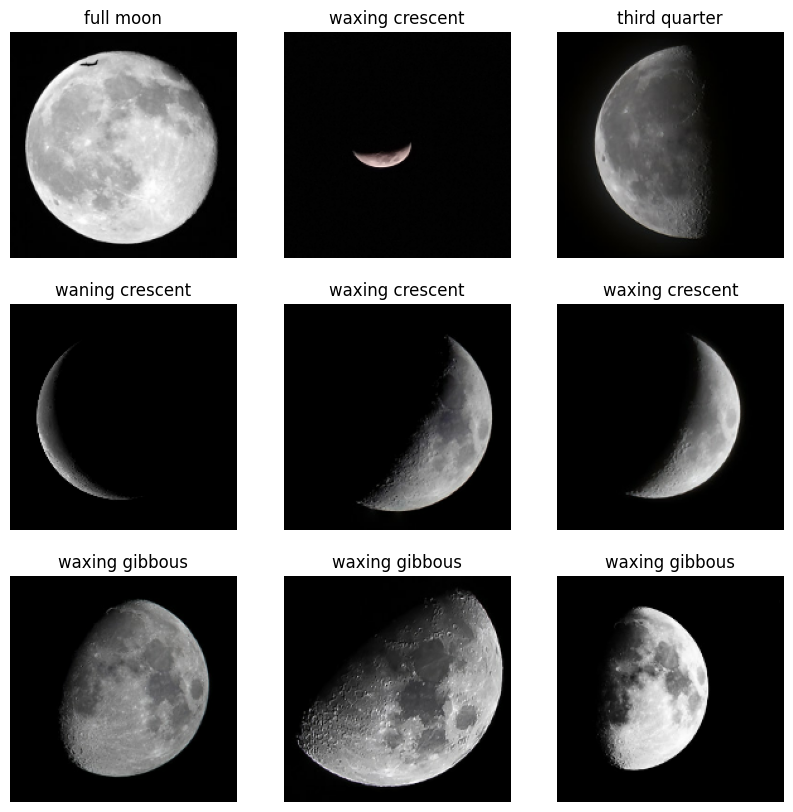

In [55]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(moon_phases[labels[i]])
        plt.axis('off')

In [56]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Data Augmentation

In [57]:
data_augmentation = Sequential([
    layers.RandomFlip("vertical", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

2024-09-20 19:43:09.592984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


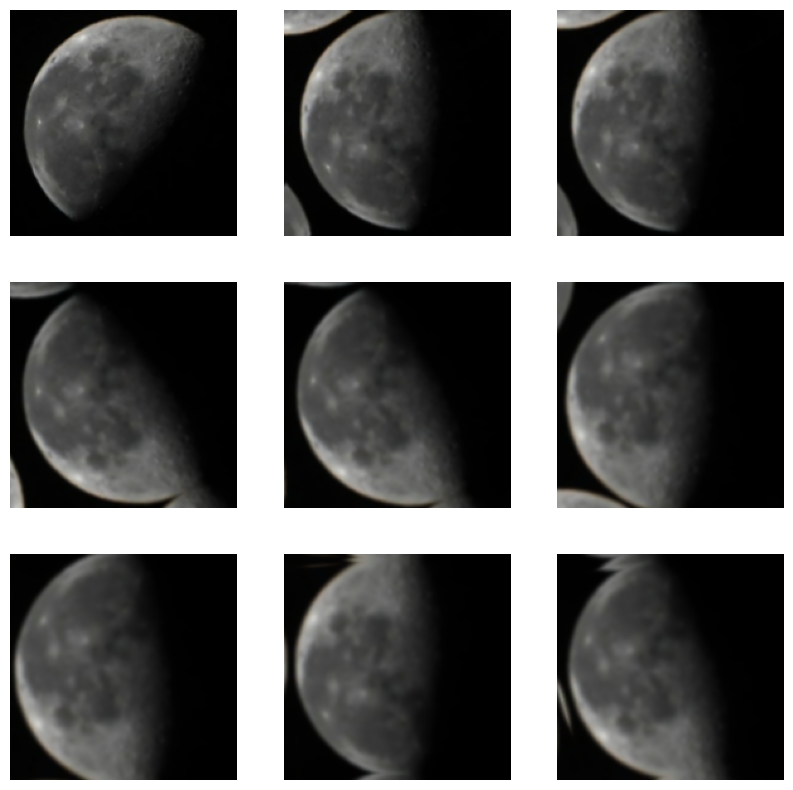

In [58]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

# Model Creation

In [59]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(8)
])

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Learning Rate Scheduling
help in faster convergence and better performance

In [62]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Early Stopping
Used to prevent overfitting. Monitor the validation loss and stop training when it starts increasing

In [63]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Training

In [64]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[lr_schedule, early_stopping]
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.3299 - loss: 1.7311 - val_accuracy: 0.5131 - val_loss: 1.3373 - learning_rate: 0.0010
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5723 - loss: 1.1878 - val_accuracy: 0.5969 - val_loss: 1.1643 - learning_rate: 0.0010
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.5995 - loss: 1.1158 - val_accuracy: 0.5550 - val_loss: 1.1318 - learning_rate: 0.0010
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6219 - loss: 0.9948 - val_accuracy: 0.6230 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6610 - loss: 0.9523 - val_accuracy: 0.5812 - val_loss: 1.1102 - learning_rate: 0.0010
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.6987 - loss: 0.8485 - val_accuracy: 0.6649 - val_loss: 1.0000 - learning_rate: 0.0010
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.7062 - loss: 0.82

# Model Evaluation
Evaluate the model's accuracy, precision, recall, and F1-score on both the training and validation datasets. This will give you a better understanding of the model's performance.

In [65]:
train_loss, train_accuracy = model.evaluate(train_ds)
val_loss, val_accuracy = model.evaluate(val_ds)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

 1/64 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7500 - loss: 0.6634

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7905 - loss: 0.5659
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7265 - loss: 0.8045
Training Accuracy: 0.7960784435272217
Validation Accuracy: 0.717277467250824


In [66]:
from sklearn.metrics import classification_report

def print_classification_report(y_true, y_pred):
  
  report = classification_report(y_true, y_pred)
  print("Classification Report:")
  print(report)
# Get true labels
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)
# Get predicted labels
y_pred = []
for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
   
print_classification_report(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


2024-09-20 19:45:43.320668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.84      0.82      0.83        38
           2       0.86      0.86      0.86         7
           3       0.71      0.54      0.61        28
           4       0.77      0.79      0.78        29
           5       0.60      0.80      0.69        15
           6       0.56      0.75      0.64        24
           7

2024-09-20 19:45:44.422010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Plot Training History
Plot the training and validation accuracy and loss curves to visualize the model's learning progress and detect overfitting.

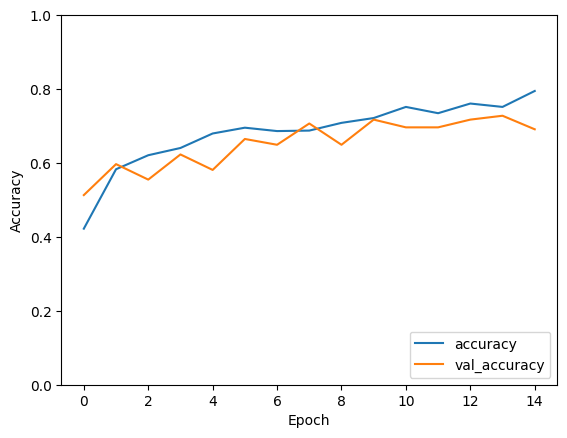

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

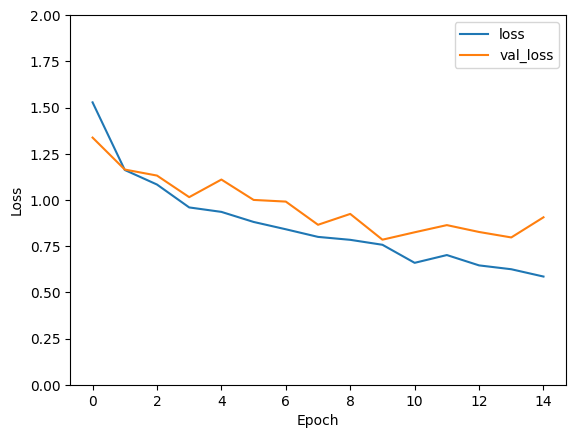

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()

## Plotting Accuracy and Loss Curves:
You can use the history object returned by the model.fit() function to access the accuracy and loss values during training. Then, you can plot these values over epochs.

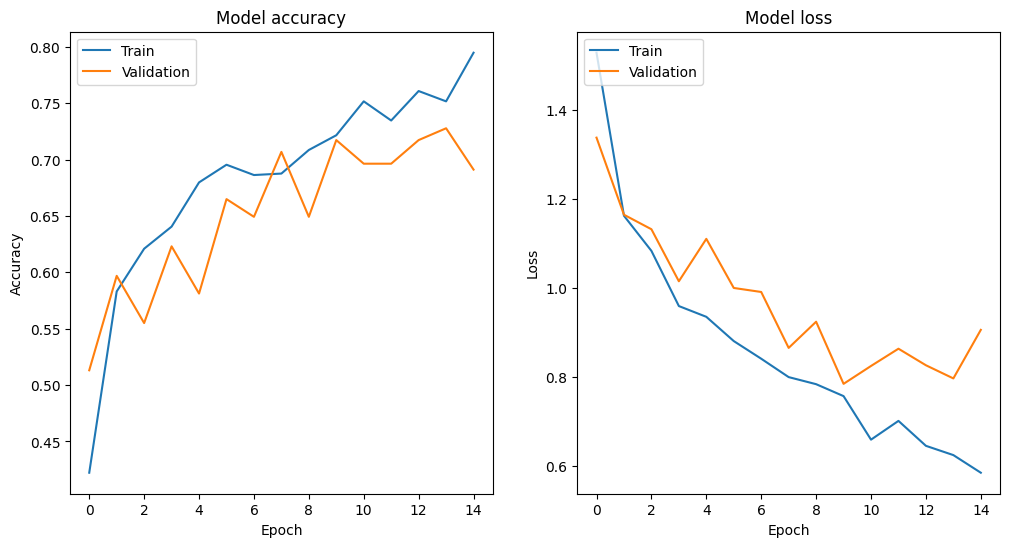

In [69]:
# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Confusion Matrix:
To generate a confusion matrix, you need predictions from your model on the validation set and corresponding true labels. You can use sklearn.metrics.confusion_matrix for this purpose.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


2024-09-20 19:45:44.929016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


2024-09-20 19:45:46.095663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


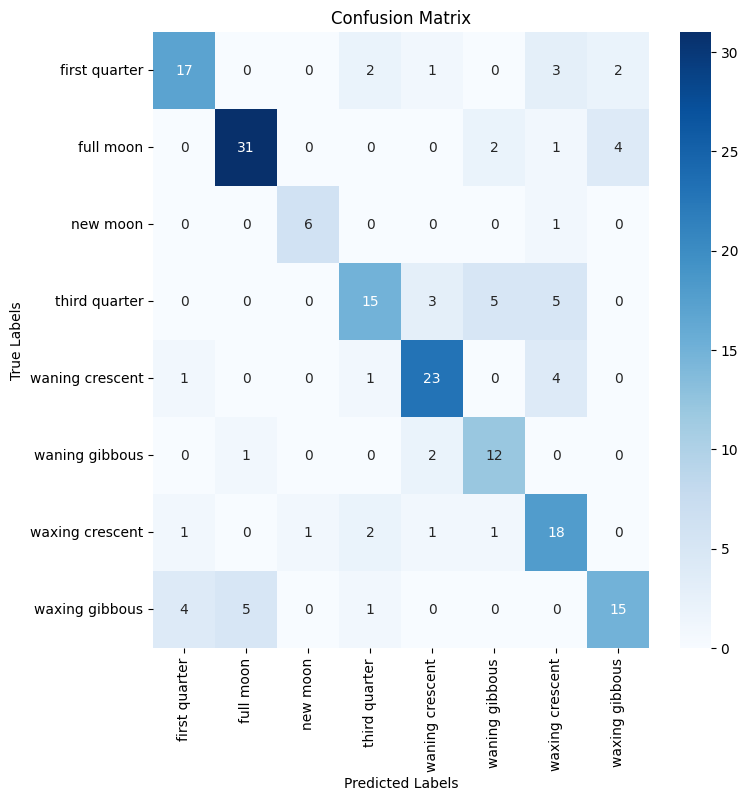

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Get true labels
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

# Get predicted labels
y_pred = []
for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, moon_phases)


# Images Testing

In [71]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + moon_phases[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [72]:
classify_images('tested images/fm.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The Image belongs to full moon with a score of 97.3686933517456'

In [73]:
classify_images('tested images/wxc.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'The Image belongs to waxing crescent with a score of 92.47931241989136'

In [74]:
classify_images('tested images/waning-gibbous.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The Image belongs to waning gibbous with a score of 83.93933176994324'

In [75]:
classify_images('tested images/third-quarter.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The Image belongs to third quarter with a score of 61.71124577522278'

In [76]:
classify_images('tested images/fr.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'The Image belongs to first quarter with a score of 81.694495677948'

In [77]:
classify_images('tested images/FullMoonRealLife.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'The Image belongs to waning gibbous with a score of 74.85694885253906'

# Save the Model

In [78]:
# model.save('Moon_Phase_Detection.h5')